In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

In [3]:
y[:5]

array([0, 0, 0, 0, 0])

In [4]:
np.unique(y)

array([0, 1])

In [5]:
df = pd.DataFrame(X, columns=data.feature_names)
df["y"] = y

df[df["y"] == 1]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


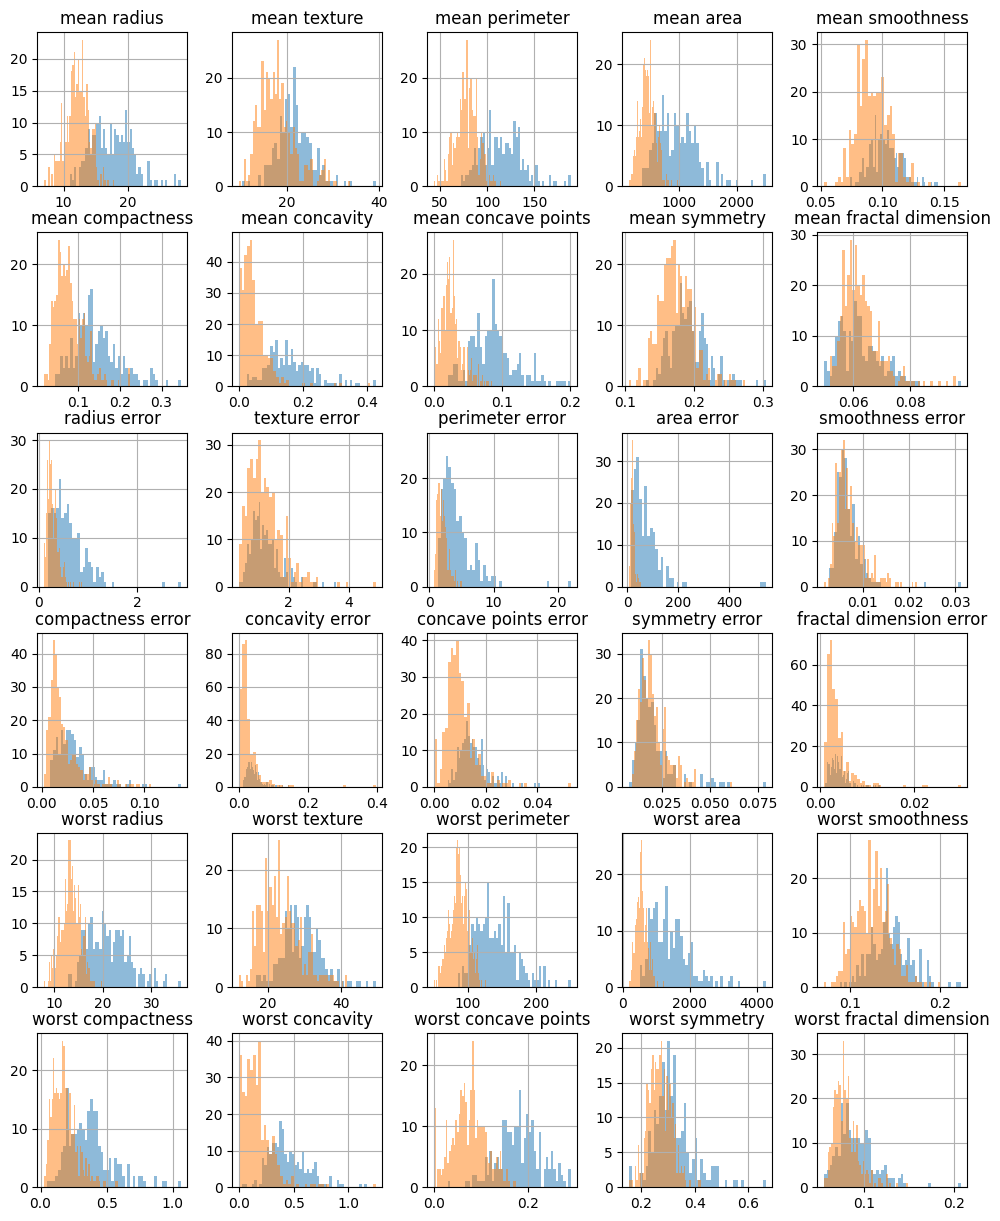

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12, 15))
df[df["y"] == 0].drop(columns="y").hist(bins=50, alpha=.5, ax=axes)
df[df["y"] == 1].drop(columns="y").hist(bins=50, alpha=.5, ax=axes)
plt.show()

In [7]:
# 학습세트와 예측세트를 분리합니다.
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, random_state=42)

X_train_raw.shape, X_test_raw.shape, y_train_raw.shape, y_test_raw.shape

((426, 30), (143, 30), (426,), (143,))

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

In [8]:
# Tensor 변환
X_train = torch.Tensor(X_train_raw)
X_valid = torch.Tensor(X_test_raw)

X_train.shape, X_valid.shape

(torch.Size([426, 30]), torch.Size([143, 30]))

In [9]:
# Label
y_train = torch.Tensor(y_train_raw)
y_valid = torch.Tensor(y_test_raw)
print(y_train.shape, y_valid.shape)
y_train[:5], y_valid[:5]

torch.Size([426]) torch.Size([143])


(tensor([1., 0., 1., 0., 0.]), tensor([1., 0., 0., 1., 1.]))

In [10]:
input_shape = X_train.shape[1]
input_shape

30

## 학습

In [11]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.seq(x)
        return x

# 모델 초기화
input_size = X_train.shape[1]
model = LogisticRegression(input_size)

# 손실 함수 및 optimizer 설정
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.001)

In [12]:
# 학습
num_epochs = 1000
best_val_loss = 0.0
num_bad_epochs = 0
early_stop_patience = 50

for epoch in range(num_epochs):
    # forward + backward + optimize
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

    # 중간 결과 출력
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    # 검증 데이터에 대한 성능 측정
    with torch.no_grad():
        model.eval()
        val_outputs = model(X_valid)
        val_loss = criterion(val_outputs.squeeze(), y_valid)

        # 검증 데이터에 대한 정확도 계산
        val_preds = (val_outputs > 0.5).float()
        val_acc = (val_preds == y_valid).float().mean()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss.item():.4f}, Val Acc: {val_acc.item():.4f}')

        # 검증 데이터에 대한 Loss 가 early_stop_patience번 연속 개선되지 않으면 조기 종료
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            num_bad_epochs = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            num_bad_epochs += 1
            if num_bad_epochs == early_stop_patience:
                print("Early stopping")
                break

Epoch [10/1000], Val Loss: 0.6931, Val Acc: 0.3776
Epoch [20/1000], Val Loss: 0.6931, Val Acc: 0.3776
Epoch [30/1000], Val Loss: 0.6931, Val Acc: 0.3776
Epoch [40/1000], Val Loss: 0.6931, Val Acc: 0.3776
Epoch [50/1000], Val Loss: 0.6931, Val Acc: 0.3776
Early stopping


## 예측

In [13]:
with torch.no_grad():
    outputs = model(X_valid)
    y_valid_predict = (outputs >= 0.5).float()
    y_valid_predict = y_valid_predict.squeeze()
    
(y_valid.squeeze() == y_valid_predict).numpy().mean()

0.3776223776223776

## 모델 저장

In [14]:
# 모델 저장
torch.save(model.state_dict(), 'model.pth')

# 저장된 모델 불러오기
loaded_model = LogisticRegression(input_size)
loaded_model.load_state_dict(torch.load('model.pth'))
loaded_model.eval()

# 예제 입력 생성
# example_input = torch.randn(1, input_size)
example_input = X_valid[0]
example_input

tensor([1.2470e+01, 1.8600e+01, 8.1090e+01, 4.8190e+02, 9.9650e-02, 1.0580e-01,
        8.0050e-02, 3.8210e-02, 1.9250e-01, 6.3730e-02, 3.9610e-01, 1.0440e+00,
        2.4970e+00, 3.0290e+01, 6.9530e-03, 1.9110e-02, 2.7010e-02, 1.0370e-02,
        1.7820e-02, 3.5860e-03, 1.4970e+01, 2.4640e+01, 9.6050e+01, 6.7790e+02,
        1.4260e-01, 2.3780e-01, 2.6710e-01, 1.0150e-01, 3.0140e-01, 8.7500e-02])

In [15]:
# 저장된 모델로 예측
with torch.no_grad():
    output = loaded_model(example_input)

print(output)

tensor([0.])


In [16]:
output, y_valid[0]

(tensor([0.]), tensor(1.))